In [31]:
import pandas as pd
import numpy as np

In [2]:
step_data = [3620, 2562,5624,8954,6932,1458]

In [6]:
step_counts = pd.Series(step_data, name = 'steps')

In [12]:
step_counts

2019-10-04    3620
2019-10-05    2562
2019-10-06    5624
2019-10-07    8954
2019-10-08    6932
2019-10-09    1458
Freq: D, Name: steps, dtype: int64

# We can changes the index of the seriex into Date index like

In [9]:
step_counts.index

RangeIndex(start=0, stop=6, step=1)

In [22]:
step_counts.index = pd.date_range('20190929', periods=6)

In [23]:
step_counts

2019-09-29    3620
2019-09-30    2562
2019-10-01    5624
2019-10-02    8954
2019-10-03    6932
2019-10-04    1458
Freq: D, Name: steps, dtype: int64

In [27]:
#step_counts['2019-10-07']
step_counts[5]

1458

# Can filter data using substring of the date

In [26]:
step_counts['2019-09']

2019-09-29    3620
2019-09-30    2562
Freq: D, Name: steps, dtype: int64

In [38]:
#Convert to the float value
step_counts.dtype

dtype('float64')

In [67]:
step_counts = step_counts.astype(np.int)

# Working With invalid data

In [79]:
step_counts[1 : 3] = np.NaN

In [80]:
step_counts

2019-09-29    3620.0
2019-09-30       NaN
2019-10-01       NaN
2019-10-02    8954.0
2019-10-03    6932.0
2019-10-04    1458.0
Freq: D, Name: steps, dtype: float64

In [83]:
step_counts = step_counts.fillna(0.)
#equivalent
#step_counts.fillna(0., inplace=True)

In [84]:
step_counts

2019-09-29    3620.0
2019-09-30       0.0
2019-10-01       0.0
2019-10-02    8954.0
2019-10-03    6932.0
2019-10-04    1458.0
Freq: D, Name: steps, dtype: float64

# Working on Dataframes

In [85]:
cycling_data = [10.7, 0, None, 2.4, 15.6, 10.9, 0, None]
#creting a tuple using zip function
joined_data_as_tuple = zip(step_data, cycling_data)

In [97]:
joined_data_as_tuple

In [98]:
joined_data = list(joined_data_as_tuple)
joined_data

[]

In [105]:
actively_df = pd.DataFrame(list(zip(step_data, cycling_data)), index=pd.date_range('20190929', periods = 6), columns=['Walking', 'Cycling'])
# Adding Column names to that data
df = pd.DataFrame()

In [106]:
actively_df

,Walking,Cycling
2019-09-29,3620,10.7
2019-09-30,2562,0.0
2019-10-01,5624,NaN
2019-10-02,8954,2.4
2019-10-03,6932,15.6
2019-10-04,1458,10.9


In [120]:
print(actively_df.loc[:,'Walking'])

2019-09-29    3620
2019-09-30    2562
2019-10-01    5624
2019-10-02    8954
2019-10-03    6932
2019-10-04    1458
Freq: D, Name: Walking, dtype: int64


In [129]:
actively_df['Walking']

2019-09-29    3620
2019-09-30    2562
2019-10-01    5624
2019-10-02    8954
2019-10-03    6932
2019-10-04    1458
Freq: D, Name: Walking, dtype: int64

# Reading data from the file 

In [140]:
filepath = 'data/Iris_Data.csv'
data = pd.read_csv(filepath)
data.iloc[-5:, :]

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [141]:
data['sepat_area'] = data.sepal_width * data.sepal_length

In [143]:
data['abbrav'] = data['species'].apply(lambda x : x.replace('Iris-', ''))

In [148]:
small_data = pd.concat([data.iloc[:2], data.iloc[-2:]])
small_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepat_area,abbrav
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,setosa
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,virginica
149,5.9,3.0,5.1,1.8,Iris-virginica,17.70,virginica


In [170]:
group_size = data.groupby('species').mean()

In [171]:
group_size

,sepal_length,sepal_width,petal_length,petal_width,sepat_area
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,17.2088
Iris-versicolor,5.936,2.770,4.260,1.326,16.5262
Iris-virginica,6.588,2.974,5.552,2.026,19.6846


In [177]:
data.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [186]:
#Sampling Data
sample_data = data.sample(n = 5, random_state=40, replace=False)
sample_data

,sepal_length,sepal_width,petal_length,petal_width,species,sepat_area,abbrav
38,4.4,3.0,1.3,0.2,Iris-setosa,13.20,setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor,16.80,versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica,20.48,virginica
117,7.7,3.8,6.7,2.2,Iris-virginica,29.26,virginica
89,5.5,2.5,4.0,1.3,Iris-versicolor,13.75,versicolor


# Visualizing Data

In [187]:
from matplotlib import pyplot as plt

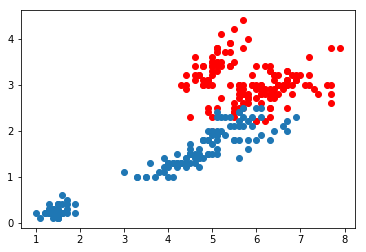

In [195]:
plt.plot(data.sepal_length, data.sepal_width, marker='o', ls='', label = 'sapal', color='r')
plt.plot(data.petal_length, data.petal_width, marker='o', ls='', label = 'petal')

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

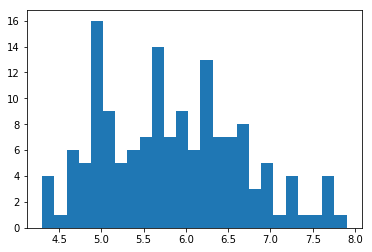

In [198]:
plt.hist(data.sepal_length, bins=25)

# Subplot on matplotlib

[Text(0,0.5,'ylabel'), Text(0.5,0,'xlabel'), Text(0.5,1,'Title')]

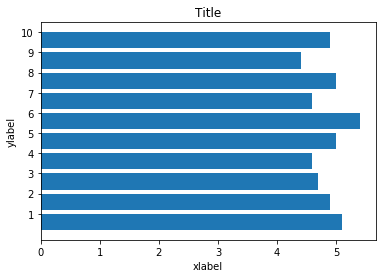

In [208]:
fig, ax = plt.subplots()
ax.barh(np.arange(10), data.sepal_length.iloc[:10])
ax.set_yticks(np.arange(0.4, 10.4, 1.0))
ax.set_yticklabels(np.arange(1, 11))
ax.set(xlabel='xlabel', ylabel='ylabel' 
       , title='Title')

,sepal_length,sepal_width,petal_length,petal_width,sepat_area
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,17.2088
Iris-versicolor,5.936,2.770,4.260,1.326,16.5262
Iris-virginica,6.588,2.974,5.552,2.026,19.6846


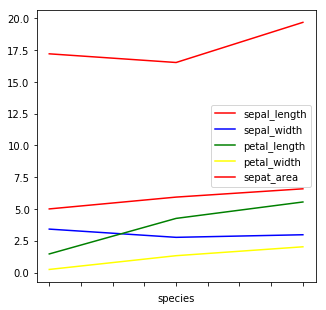

In [214]:
data.groupby('species').mean().plot(color = ['red', 'blue', 'green', 'yellow'], fontsize = 10.0 , figsize = (5, 5))
data.groupby('species').mean()

In [215]:
import seaborn as sns

/home/pravesh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/pravesh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/pravesh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


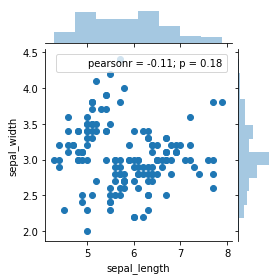

In [216]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = data, size = 4)